In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

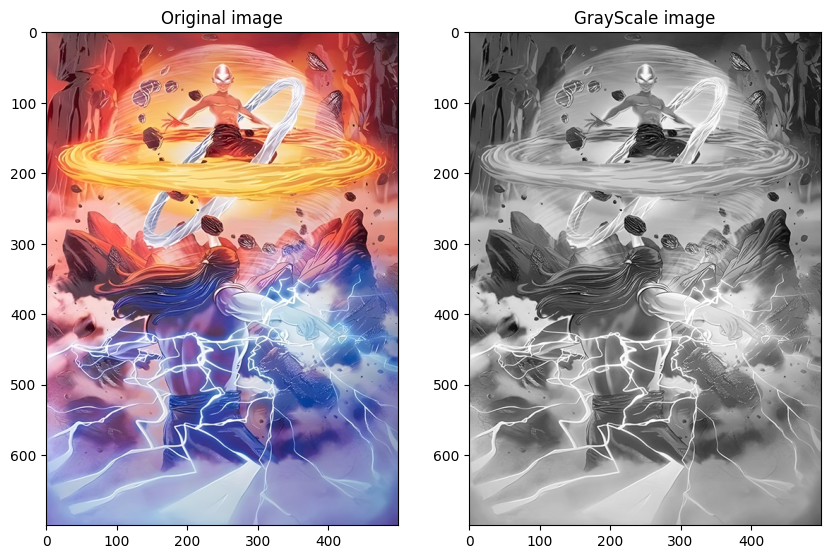

In [2]:
image = plt.imread("aang.jpg")
gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)

plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.title("Original image")
plt.imshow(image)
plt.subplot(1,2,2)
plt.title("GrayScale image")
plt.imshow(gray, cmap='gray')

In [3]:
grayvalue = [i for i in range(256)]
colorvalue = [i for i in range(256)]

In [4]:
RedImg = np.zeros(image.shape)
GreenImg = np.zeros(image.shape)
BlueImg = np.zeros(image.shape)

RedImg[:,:,0] = image[:,:,0] 
GreenImg[:,:,1] = image[:,:,1]  
BlueImg[:,:,2] = image[:,:,2]  

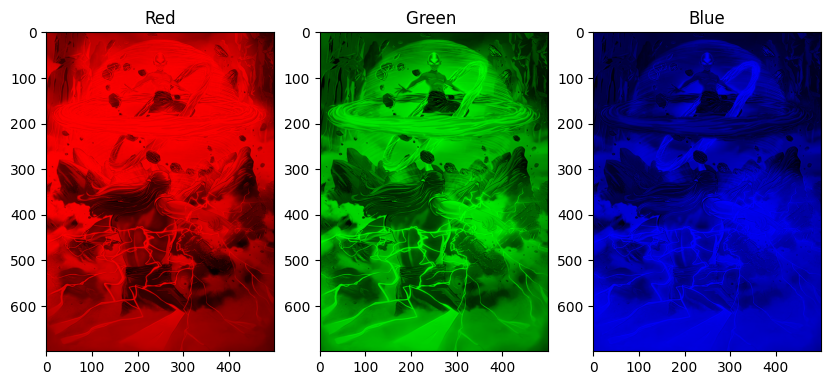

In [5]:
plt.figure(figsize=(10, 8))
plt.subplot(1,3,1)
plt.title("Red")
plt.imshow(RedImg/255, cmap='Reds')
plt.subplot(1,3,2)
plt.title("Green ")
plt.imshow(GreenImg/255, cmap='Greens')
plt.subplot(1,3,3)
plt.title("Blue")
plt.imshow(BlueImg/255, cmap='Blues')

## GRAYSCALE HISTOGRAM

In [6]:
sumGray = np.zeros(256)
for x in range (gray.shape[0]):
    for y in range(gray.shape[1]):
        nilai = gray[x,y]
        sumGray[nilai] += 1

<BarContainer object of 256 artists>

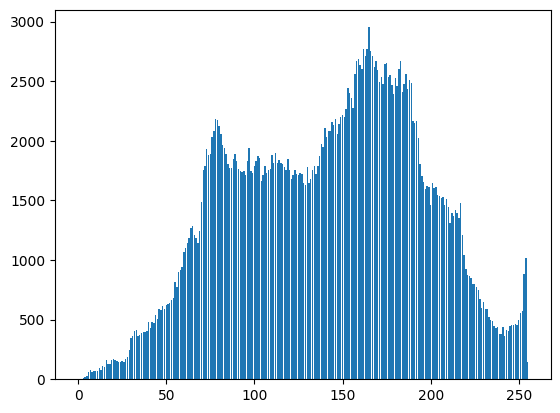

In [7]:
plt.bar(grayvalue, sumGray)

## COLOR HISTOGRAM

In [8]:
sumBlue = np.zeros(256)
sumGreen = np.zeros(256)
sumRed = np.zeros(256)
for x in range (image.shape[0]):
    for y in range(image.shape[1]):
        sumBlue[image[x,y,0]] += 1
        sumGreen[image[x,y,1]] += 1
        sumRed[image[x,y,2]] += 1

Text(0, 0.5, 'Number of Pixels')

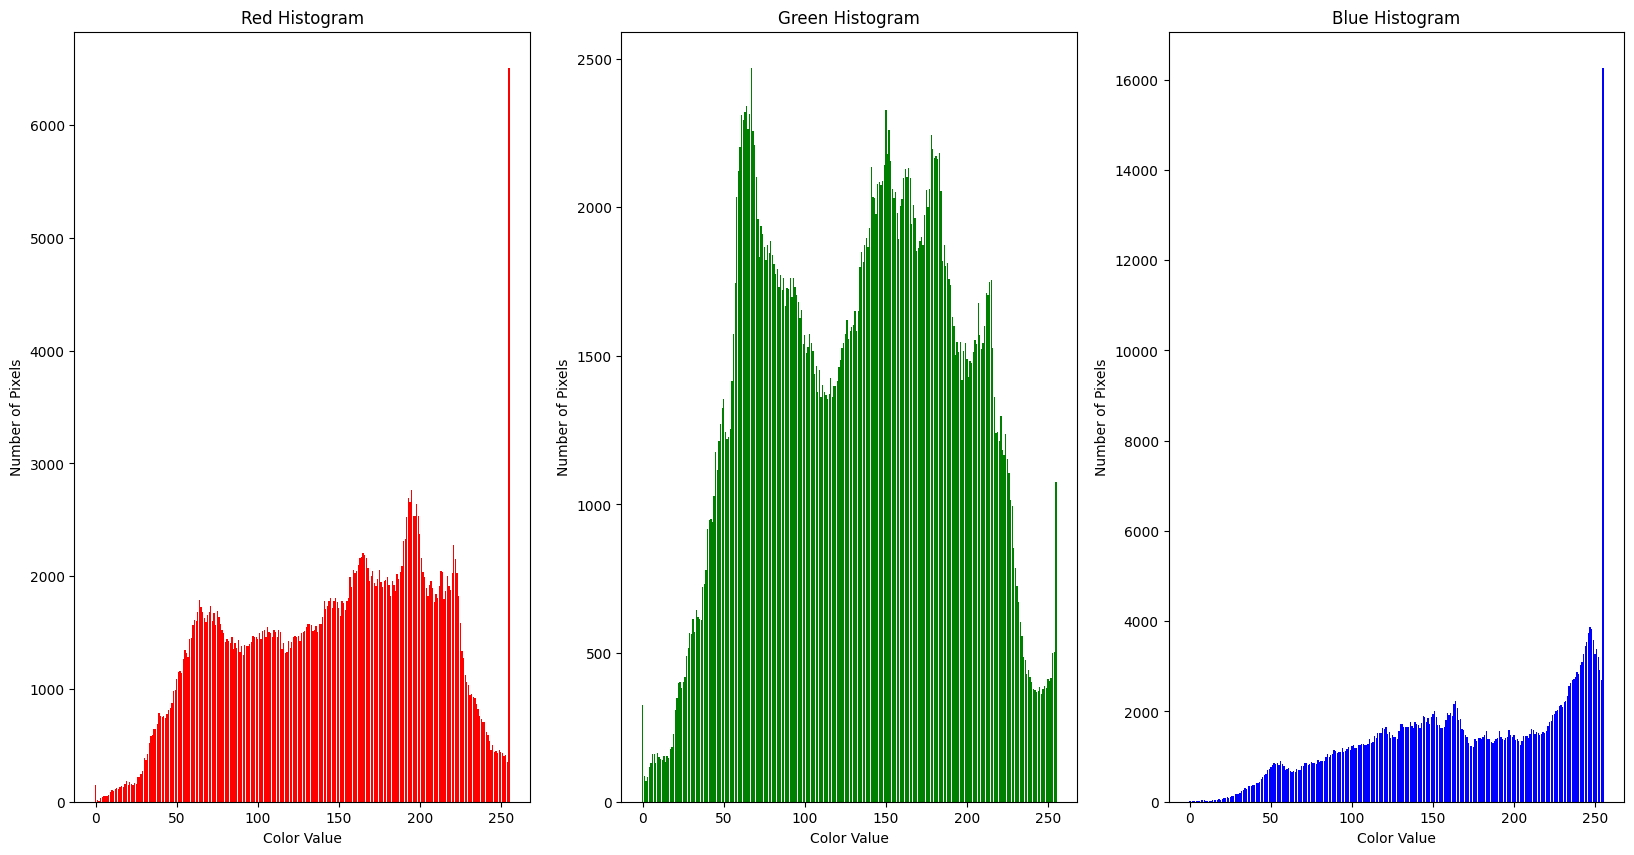

In [9]:
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
plt.title("Red Histogram")
plt.bar(colorvalue, sumRed, color='r')
plt.xlabel('Color Value')
plt.ylabel('Number of Pixels')
plt.subplot(1,3,2)
plt.title("Green Histogram")
plt.bar(colorvalue, sumGreen, color= 'g')
plt.xlabel('Color Value')
plt.ylabel('Number of Pixels')
plt.subplot(1,3,3)
plt.title("Blue Histogram")
plt.bar(colorvalue, sumBlue, color='b')
plt.xlabel('Color Value')
plt.ylabel('Number of Pixels')


In [10]:

def padding (img, kernel):
     if len(kernel)%2 == 0:
          n = int(len(kernel)/2)
          result = np.pad (img, ([n,n+1],[n,n+1]))
     else:
          n = int((len(kernel)-1)/2)
          result = np.pad (img, ([n,n],[n,n]))
     return result

def konvolusi(pad, img, kernel):
     result = np.zeros(img.shape).astype(int)
     for i in range(img.shape[0]):
          for j in range(img.shape[1]):
            
                for k in range(len(kernel)):
                     for l in range(len(kernel)):
                         result[i,j] += pad[i+k,j+l] * kernel[k][l]
     return result

In [11]:
kernel = [[1,2,-1,1],
          [0,2,1,2],
          [2,1,1,0],
          [1,0,-1,0]]

In [12]:
imgpad = padding(gray,kernel)
imgcon = konvolusi(imgpad,gray,kernel)

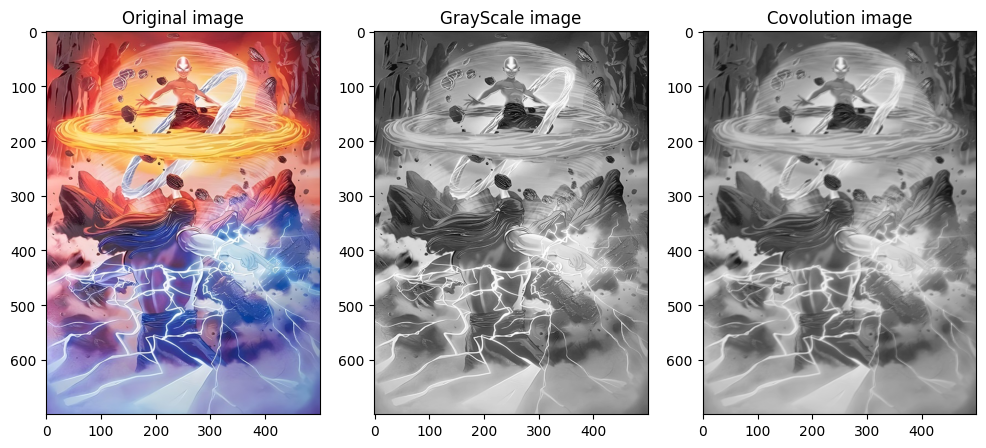

In [13]:
plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
plt.title("Original image")
plt.imshow(image)
plt.subplot(1,3,2)
plt.title("GrayScale image")
plt.imshow(gray, cmap='gray')
plt.subplot(1,3,3)
plt.title("Covolution image")
plt.imshow(imgcon,cmap='gray')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


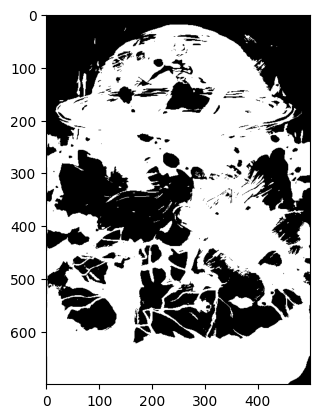

In [28]:
max_val = np.max(imgcon)
min_val = np.min(imgcon)
normalisasi = np.round((imgcon - min_val)/(max_val - min_val))
print(normalisasi)
plt.imshow(normalisasi, cmap='gray')

## TRANSLASI

In [15]:
def translation(image, x, y):
    TRmatrix = np.array([[1, 0, y],
                         [0, 1, x],
                         [0, 0, 1]])

    result = np.zeros(image.shape)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            new_coords = np.dot(TRmatrix, [i, j, 1])
            new_i = int(new_coords[0])
            new_j = int(new_coords[1])

            if 0 <= new_i < image.shape[0] and 0 <= new_j < image.shape[1]:
                result[new_i, new_j] = image[i, j]

    return result
     
     

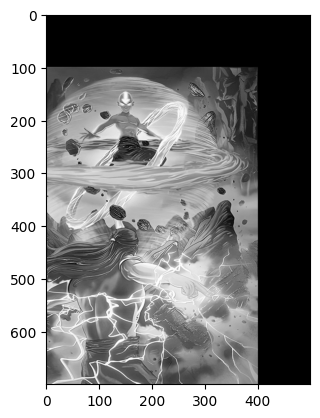

In [29]:
transimage = translation(gray,100,100)
plt.imshow(transimage, cmap='gray')

## ROTASI

In [40]:
def rotation(image, sudut):
     result = np.zeros(image.shape)
     degree = sudut*(np.pi/180)

     mid_x = image.shape[1]//2
     mid_y = image.shape[0]//2

     for i in range(image.shape[0]):
          for j in range(image.shape[1]):
               x2 = int((i - mid_x) * np.cos(degree) - (j - mid_y) * np.sin(degree) + mid_x) 
               y2 = int((i - mid_x) * np.sin(degree) + (j - mid_y) * np.cos(degree) + mid_x)
               if 0 <= x2 < image.shape[0] and 0 <= y2 < image.shape[1]:
                    result[i][j] =  image[x2][y2]
     return result



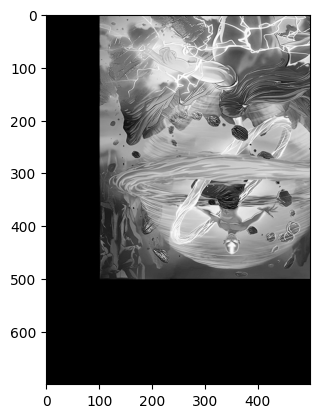

In [41]:
RotationImage = rotation(gray,180)
plt.imshow(RotationImage, cmap='gray')

## CERMIN

In [19]:
def mirror(image, mirror):
     result = np.zeros(image.shape)
     if 'x' in mirror:
          for i in range(image.shape[0]):
               for j in range(image.shape[1]):
                    result[i][j] = image[(image.shape[0]-1) - i][j]
     if 'y' in mirror:
          for i in range(image.shape[0]):
               for j in range(image.shape[1]):
                    result[i][j] = image[i][(image.shape[1]-1) - j]
     return result

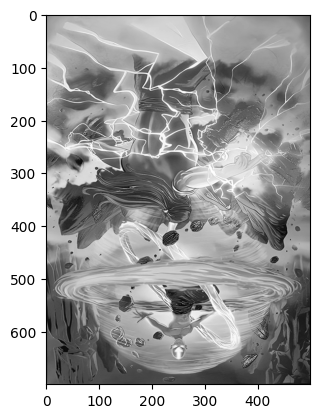

In [33]:
mirrorImage = mirror(gray,'x')
plt.imshow(mirrorImage, cmap='gray')

## DILATASI

In [22]:
def dilatation(image,scale):
     height, width = image.shape
     result = np.zeros([scale*height,scale*width])
     for i in range(image.shape[0]):
          for j in range(image.shape[1]):
               
               for k in range(scale):
                    for l in range(scale):
                         result[scale*i+k][scale*j+l] = image[i][j]
     return result

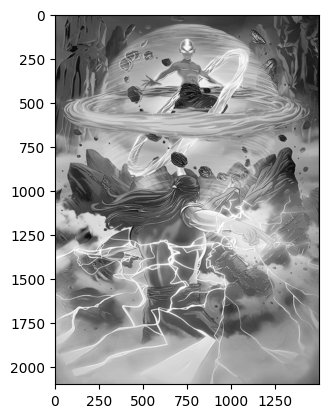

In [23]:
dilatationImage = dilatation(gray,3)
plt.imshow(dilatationImage, cmap='gray')

## NEGATIVE

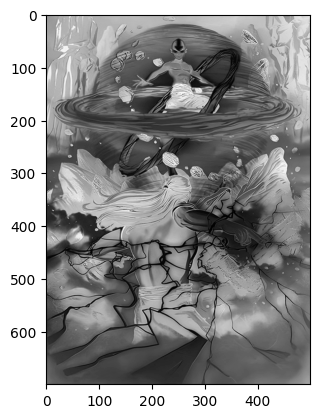

In [24]:
negative = 255 - gray
plt.imshow(negative, cmap='gray')

In [25]:
def dilatasi(image, zoom_factor):
    height, width = image.shape
    
    
    new_height = int(height * zoom_factor)
    new_width = int(width * zoom_factor)
    
    # Membuat citra baru dengan dimensi yang diperbesar
    result = np.zeros((new_height, new_width))
    
    # Mengisi citra baru dengan nilai citra asli
    for i in range(new_height):
        for j in range(new_width):
            new_i = int(i / zoom_factor)
            new_j = int(j / zoom_factor)
            result[i, j] = image[new_i, new_j]
    
    return result


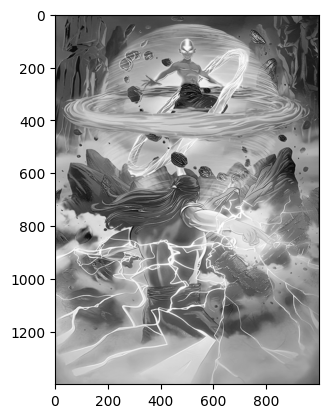

In [26]:
zoomImage = dilatasi(gray,2)
plt.imshow(zoomImage, cmap='gray')

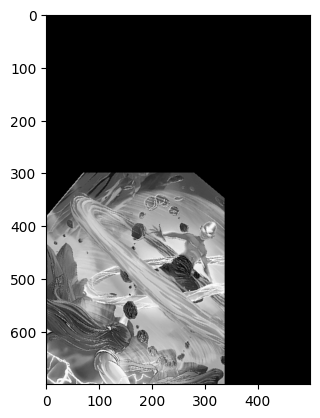

In [35]:
img1 = rotation(gray,40)
img2 = translation(img1,-163,300)

plt.imshow(img2, cmap='gray')

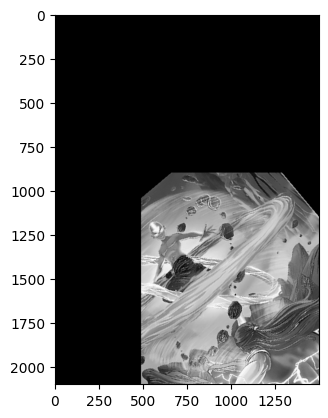

In [37]:
img3 = mirror(img2,'y')
img4 = dilatation(img3,3);

plt.imshow(img4, cmap='gray')